# Linear Regression

In this notebook we will predict some variables regarding the housing price in Boston using the Boston Housing datatset from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.

First we have to import some libraries:

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures

## Loading the Data

Let's load the data. Don't download it from the website, we have provided you with a cleaned version.

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('boston.csv', delimiter=r"\s+")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


There are 14 attributes in each case of the dataset. They are:

 -   CRIM - per capita crime rate by town
 -   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 -   INDUS - proportion of non-retail business acres per town.
 -   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 -   NOX - nitric oxides concentration (parts per 10 million)
 -   RM - average number of rooms per dwelling
 -   AGE - proportion of owner-occupied units built prior to 1940
 -   DIS - weighted distances to five Boston employment centres
 -   RAD - index of accessibility to radial highways
 -   TAX - full-value property-tax rate per \$10,000
 -   PTRATIO - pupil-teacher ratio by town
 -   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 -   LSTAT - % lower status of the population
 -   MEDV - Median value of owner-occupied homes in \$1000's

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Exploration

A table of numbers is not usefull to interpret dependencies between variables. So let's plot the data we have. Have a look at the overview plot below and see which properties correlate with each other. Make some notes in the text cell below the plot.

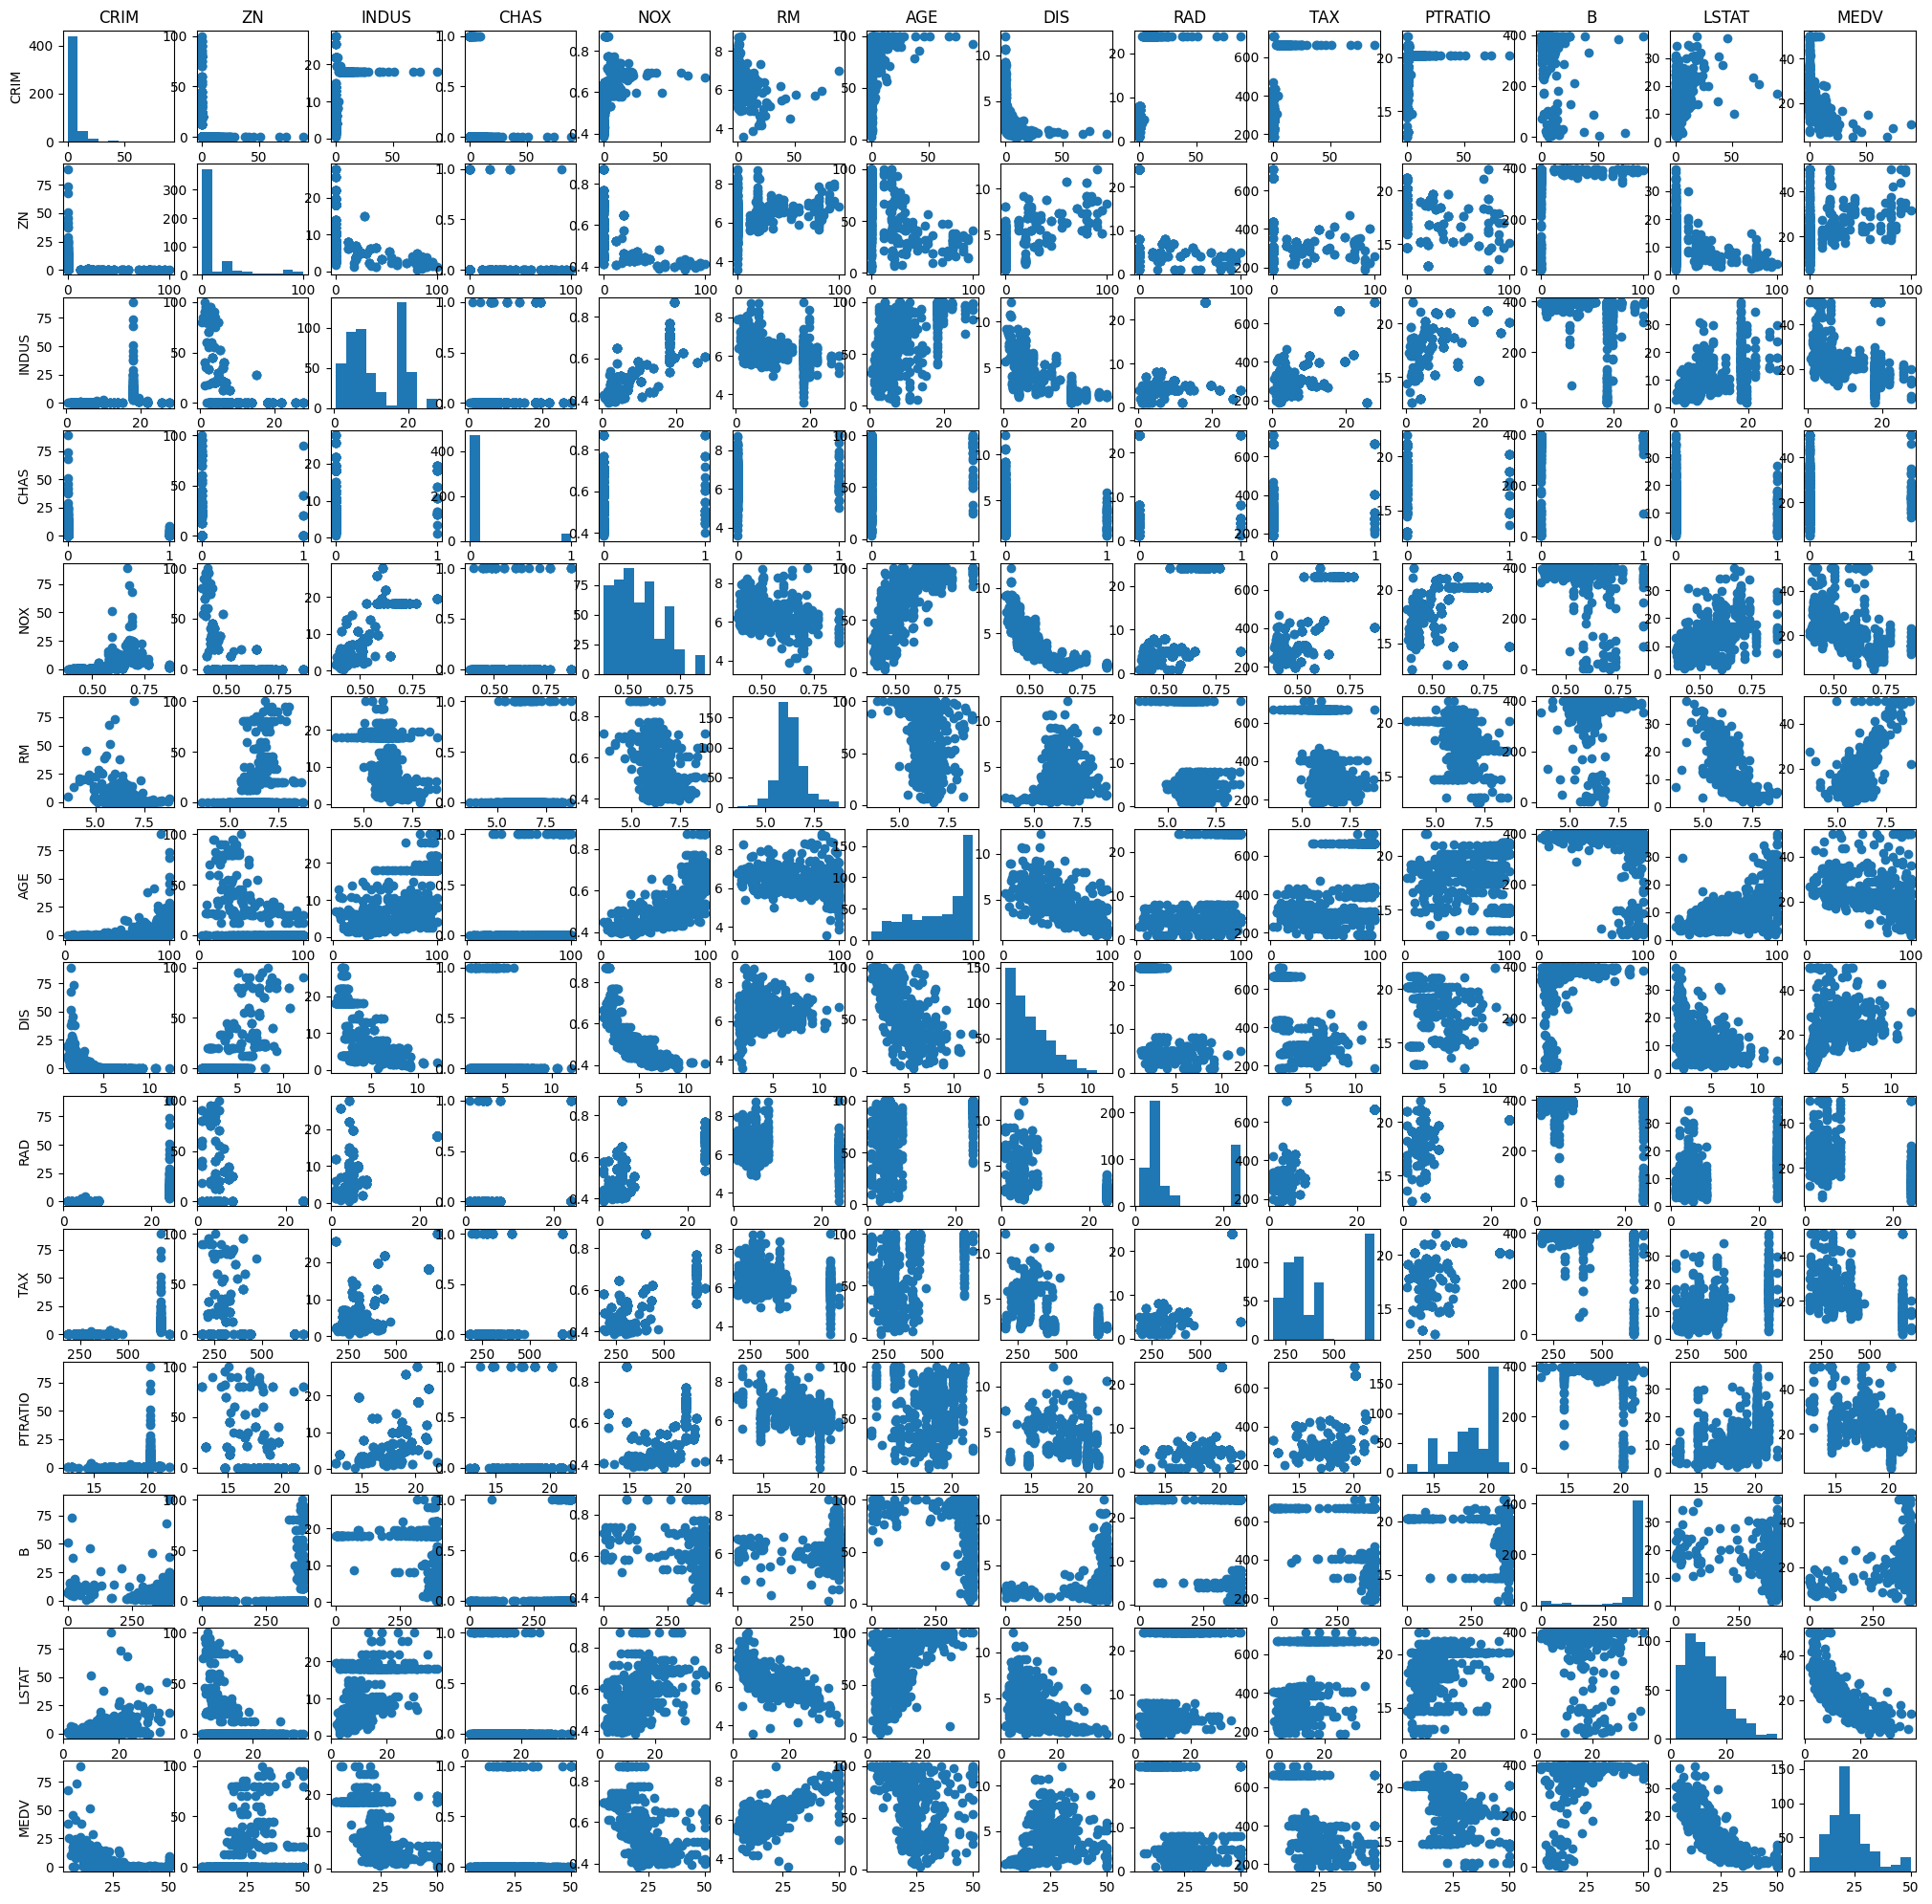

In [4]:
fig, axs = plt.subplots(len(column_names), len(column_names), figsize=(25, 25))

for i in range(len(column_names)):
  for j in range(len(column_names)):
    if i != j:
      axs[i,j].scatter(dataset[column_names[i]], dataset[column_names[j]])
    else:
      axs[i,j].hist(dataset[column_names[i]])
    axs[0,j].set_title(column_names[j])
  axs[i,0].set(ylabel=column_names[i])

plt.show()

### Your observations:
*Make some notes on what you can observe in the plot. E.g. positive-, negative correlation, value ranges, outliers. Have a look at the variables explanation above as well. Can you explain some of your observations?*


## Regression (Analytical solution)

After we now got aquainted with the data we have, let's start with linear regression by hand. To keep it simple we are using only one of the variables to predict a target variable. This enables us to visualize everything in 2D as well.
Remember that with linear regression we assume the output to be a linear function of the input.

Based on your observations above choose two variables that you assume to have a linear dependence. Fill the variable names in the cell below and have a closer look:

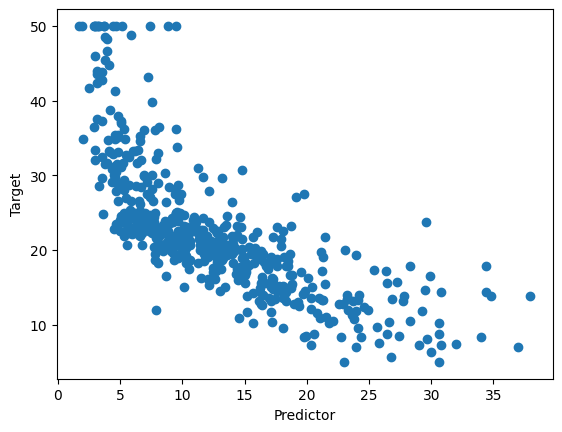

In [5]:
predictor = 'LSTAT' #TODO: fill in a column name
target = 'MEDV' #TODO: fill in a column name

X = np.array(dataset[predictor].tolist()).reshape(-1, 1)
y = np.array(dataset[target].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.xlabel("Predictor")
plt.ylabel("Target")
plt.show()

Try to fit a line through the datapoints by filling in the weight and bias variables in the code cell below.

Remember, that a line is defined by m*x+b where m is the weight or slope of the line and the bias term b where the line cuts the y-axis (x=0). A positive value for m means the line goes 'up' the larger x gets; a negative value has the line go 'down'. If you are unsure, just play around with the values in the code cell and see what happens.

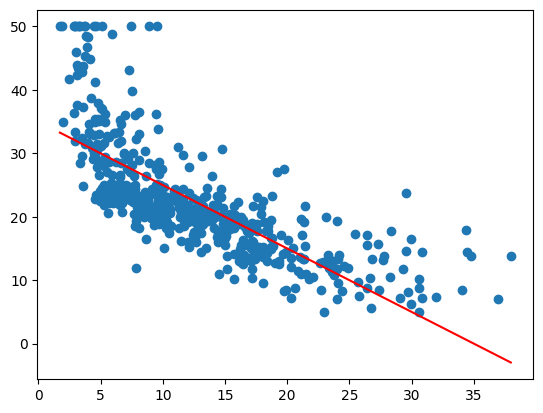

In [6]:
# Have a try at guessing the best line
weight = -1 #TODO: fill in a number
bias = 35 #TODO: fill in a number

lineStart_hand = X.min() * weight + bias
lineEnd_hand = X.max() * weight + bias

plt.scatter(X, y)
plt.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r')
plt.show()

In theory we could write the problem as a system of equations in the form of:

$y_1 = b + w*x_1$

$\;\;\;\;\;\;\;\;\;\;$&#8942;

$y_n = b + w*x_n$

For every point of our dataset.

### Evaluation

Of course we need to evaluate how well the line is fitted to the data. To do that we use $R^2$.

The coefficient of determination $R^2$ is defined as $(1 - \frac{u}{v})$
, where $u$ is the residual sum of squares
```((y_true - y_pred)** 2).sum()```
and $v$ is the total sum of squares
```((y_true - y_true.mean()) ** 2).sum()```.
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0.

(from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
score(X, y, sample_weight=None) )

Another comonly used metric is Mean Squared Error (MSE), a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
$\frac{1}{N} ∑_{i=0}^{N-1}(y_i - ŷ_i)^2$ where $ŷ$ is the prediction.

In contrast to the $R^2$ metric, a MSE of 0 is the best that we can achieve (prediction is equal to the target).

In [7]:
def reg_score(X, y, weight, bias):
  u_f = lambda X, y: (y - (X * weight + bias))**2

  u = u_f(X, y).sum(axis=0)
  v = ((y - y.mean()) ** 2).sum(axis=0)

  r = 1 - (u/v)

  return r

def mse(X, y, weight, bias):
    mse = np.power((X * weight + bias)-y, 2)
    mse = mse.sum(axis=0)

    return mse/X.shape[0]


Let's see how your model performs:

In [8]:
print("R^2: ", reg_score(X, y, weight, bias).item())
print("MSE: ", mse(X, y, weight, bias))

R^2:  0.5422328619554297
MSE:  [38.64449862]


To set the numbers into perspective we can look at the contour plot of our metrics. To make this plot we calculate the metrics for various combinations of the weight and bias terms. See the code and both plots in the next two cells.

In [9]:
def plot_contour(w_min, w_max, b_min, b_max, metric_function, title, resolution=100, cmap='coolwarm'):
  ws = np.linspace(w_min, w_max, resolution) #slope range
  bs = np.linspace(b_min, b_max, resolution) #intercept
  WS, BS = np.meshgrid(ws, bs)

  Z = metric_function(X, y, WS.flatten(), BS.flatten())

  fig, ax = plt.subplots()
  cs = ax.contourf(WS, BS, Z.reshape(WS.shape), cmap=cmap)
  ax.grid(c='k', ls='-', alpha=0.3)
  ax.set_title(title)
  ax.set_xlabel("Weight")
  ax.set_ylabel("Bias")
  plt.colorbar(cs)
  plt.show()

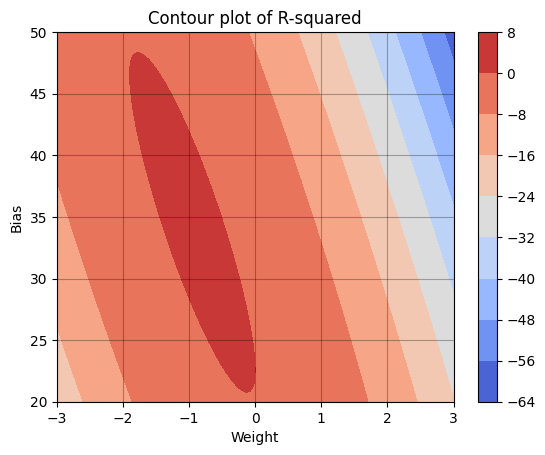

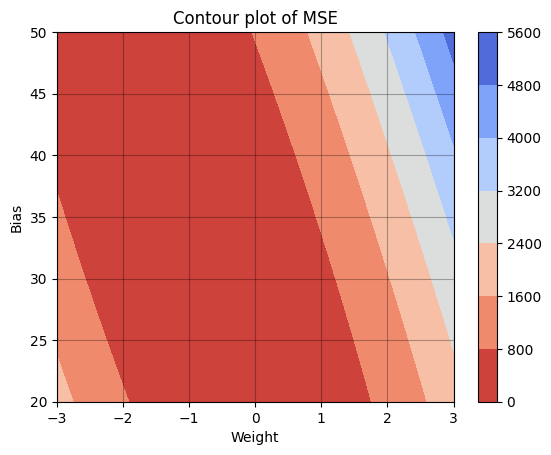

In [10]:
plot_contour(-3, 3, 20, 50, reg_score, 'Contour plot of R-squared')
plot_contour(-3, 3, 20, 50, mse, 'Contour plot of MSE', cmap='coolwarm_r')

Based on the contour plots how far away from the optimum are you?
Try again a few times and see if you can get a better fit...
Keep a list of what you tried and the resulting scores in the cell below.

| Weight | Bias |  R^2 | MSE |
|--------|------|------|-----|
|        |      |      |     |
|        |      |      |     |
|        |      |      |     |

If you are sattisfied that you cannot improve lets try it using the SKlearn function (see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html if you want more information):

In [11]:
reg = LinearRegression().fit( X, y)

Let's see how the model performs:

In [12]:
# The coefficients
print(f"Weight: {reg.coef_.item()} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_.item(), reg.intercept_.item()).item())

Weight: -0.9500493537579906 ; Bias:34.5538408793831
with R^2 score:  0.5441462975864797  and MSE:  38.48296722989415


How does your score compare to your best try? How about the comparison of the lines in the plot below? Is it obvious to you which one is better?

*Your answer goes here*

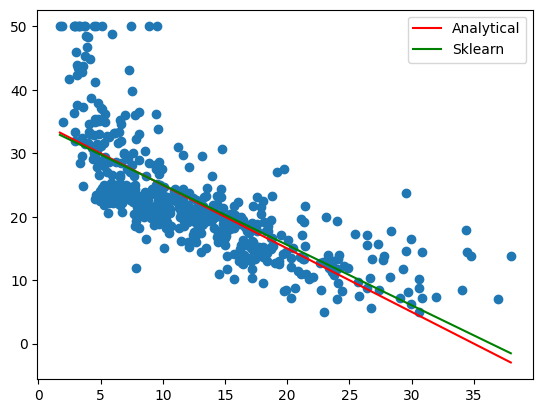

In [13]:
lineStart = X.min() * reg.coef_[0] + reg.intercept_
lineEnd = X.max() * reg.coef_[0] + reg.intercept_

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r', label='Analytical')
ax.plot([X.min(), X.max()], [lineStart, lineEnd], color = 'g', label='Sklearn')
ax.legend()
plt.show()

## Residual analysis

Let' have a closer look at the fitted line using the so called residuals. With that we can analyse the part of the data that is not explained by the model. The residual of each point is defined by the distance to the regression line.

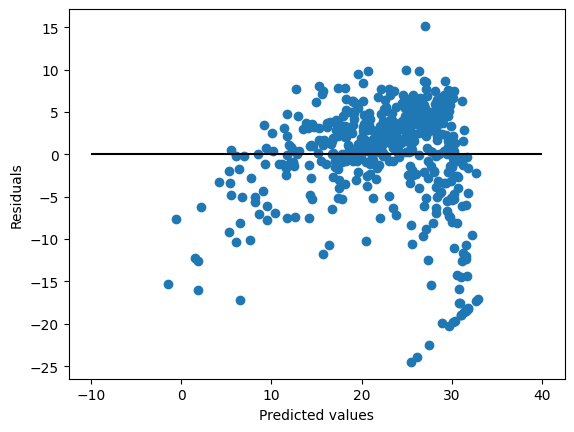

In [14]:
pred = reg.predict(X)
plt.scatter(pred, pred - y)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y=0, xmin=-10, xmax=40, color='black')
plt.show()

If we would have a perfect fit of our model the residuals would all be zero. As this never happens the residuals should be randomly scattered around 0. If you can observe any pattern in the residual plot it is an indication that there is some information present in the data that our model can not capture.
We can also use the residual plot to identify outliers in our data which are far away from the center line.

## Polynomial linear regression

Just assuming a linear dependency not coing to work in many real world problems. Have a look at the plot below: how would you describe the shape of the data?

*your answer goes here*

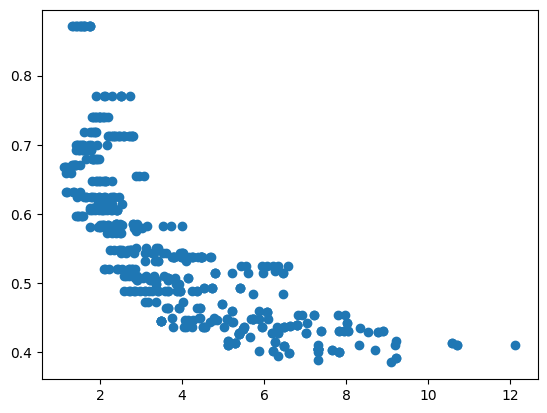

In [15]:
X = np.array(dataset['DIS'].tolist()).reshape(-1, 1)
y = np.array(dataset['NOX'].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.show()

Let's fit the regression model the same way we did before and have a look at the resulting $R^2$ and MSE score.

In [16]:
# to work with the multi dimmensional data we have to redefine the mse function
def mse(X, y, weight, bias):
    y = y.reshape(-1)
    mse_val = np.sum(X * weight, axis=1)
    mse_val = mse_val + bias
    mse_val = np.power(mse_val-y, 2)
    mse_val = mse_val.sum(axis=0)

    return mse_val/X.shape[0]

In [17]:
# Your code goes here
reg = LinearRegression().fit( X, y)
print(f"Weight: {reg.coef_.item()} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_.item(), reg.intercept_.item()).item())

Weight: -0.04233089656877705 ; Bias:0.715342618777651
with R^2 score:  0.5917149670934201  and MSE:  0.005471468100729794


Instead of assuming the linear dependency let's try to model it as a polynomial. So instead of searching $w$ and $b$ for $y = X*w +b$ we assume $y = X*w_1 + X^2*w_2 + ... + X^n*w_n + b $. To do that Sklearn provides the function PolynomialFeatures (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

First, let us test a polynomial of degree 2. So $y = X*w_1 + X^2*w_2 + b$.

In [18]:
degree = 2
poly = PolynomialFeatures(degree)
T = poly.fit_transform(X)
T = T[:,1:] # remove the first column as this is always 1

reg = LinearRegression().fit( T, y)
print(f"Weights: {reg.coef_[0]} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(T, y), " and MSE: ", mse(T, y, np.tile(reg.coef_[0], (len(T), 1)), reg.intercept_.item()))

Weights: [-0.1116276   0.00713503] ; Bias:0.8439910707412352
with R^2 score:  0.6998562064647851  and MSE:  0.004022256657974815


How does the weight and bias terms change compared to the linear model before? What about the scores?

*your answer goes here*

Try a few more degrees by editing the cell and see how the sores change. To keep track of your changes fill in the table below.

| Weight Vector | Bias |  R^2 | MSE |
|---------------|------|------|-----|
|               |      |      |     |
|               |      |      |     |
|               |      |      |     |

## Multivariate regression

As we just saw just one variable is not always a good predictor. If you think about it it makes sense as life is complicated and many variables can be influential. As at some point we cannot visualize the results properly for the purpose of the assignment we will only have a look at 2 input variables. This way we can visualize it in 3D space. However, the same technique can be applied to more than 2 input variables as well.

Same as before: have a look at the plot below (you can zoom in/out and move it with your cursor) and try some variables for the slope and intercept. This time you need to pick 2 weights for the slope.

In [19]:
input_columns = ['DIS', 'LSTAT']
X = np.array(dataset[input_columns].values)
y = np.array(dataset['MEDV'].tolist()).reshape(-1, 1)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['MEDV'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )))

fig.show()

In [20]:
weights = [0.6, -1]
bias = 38

# greate a meshgrid to plot the decision plane
xs = np.linspace(X[:,0].min(), X[:,0].max(), 100)
ys = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xs, ys = np.meshgrid(xs, ys)

zs = xs * weights[0] + ys * weights[1] + bias

fig = go.Figure()
fig.add_surface(x=xs,y=ys,z=zs,showscale=False,showlegend=False, colorscale ='Reds')

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['MEDV'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )))

fig.show()

In [21]:
print("with R^2 score: ", reg_score(X, y, weights, bias), " and MSE: ", mse(X, y, weights, bias))

with R^2 score:  [-3.67987736  0.44883291]  and MSE:  69.27638783823714


In [22]:
reg = LinearRegression().fit( X, y)

# The coefficients
print(f"Coefficient: {reg.coef_[0]} ; Interceptor:{reg.intercept_}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_, reg.intercept_.item()))

zs_model = xs * reg.coef_[0][0] + ys * reg.coef_[0][1] + reg.intercept_.item()

fig = go.Figure()
fig.add_surface(x=xs,y=ys,z=zs,showscale=False,showlegend=True, colorscale ='Reds', name='Analytical')
fig.add_surface(x=xs,y=ys,z=zs_model,showscale=False,showlegend=True, colorscale ='Greens', name= 'Model')

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['MEDV'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ), name = 'Data'))

fig.show()

Coefficient: [-0.67683249 -1.04923978] ; Interceptor:[38.3775118]
with R^2 score:  0.5622284255429311  and MSE:  36.956482013451534


Compare the two planes and the scores. What do you observe?

*Your answer goes here*

## Final Regression

Now we got some insights in the data at hand. It is time to move on to our ultimage goal: predicting the median value of owner-occupied homes. Based on the correlation plot below select the best features to train a regression model.

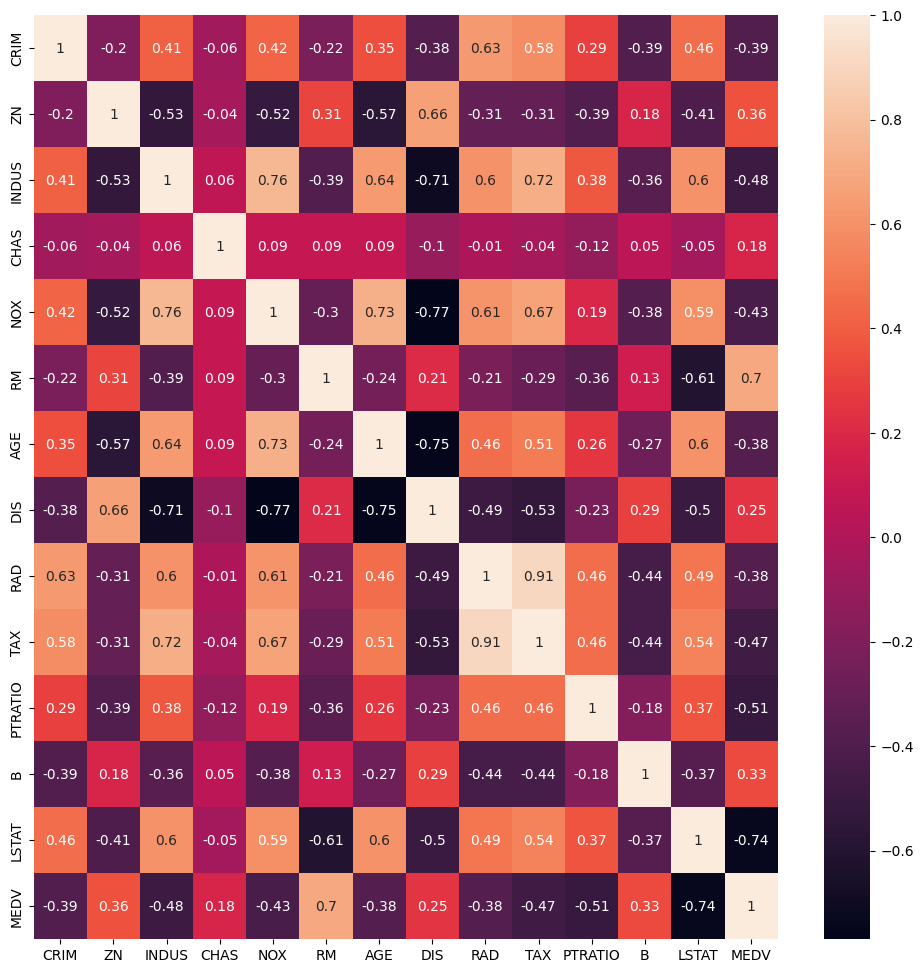

In [27]:
import seaborn as sns

correlation_matrix = dataset.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax) # annot = True to print the values inside the square
plt.show()

In [28]:
# Your code goes here

input_columns = ['RM', 'LSTAT', 'INDUS', 'PTRATIO']
X = np.array(dataset[input_columns].values)
y = np.array(dataset['MEDV'].tolist()).reshape(-1, 1)

reg = LinearRegression().fit( X, y)

# The coefficients
print(f"Coefficient: {reg.coef_[0]} ; Interceptor:{reg.intercept_}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_, reg.intercept_.item()))

Coefficient: [ 4.51517866 -0.57571066  0.00756681 -0.93512212] ; Interceptor:[18.61497042]
with R^2 score:  0.6786434855761493  and MSE:  27.128774315553887
